In [1]:
# imports 

import numpy as np 
import pandas as pd 
import sqlite3 as sql
from sqlite3 import Error
import requests
import matplotlib.pyplot as plt

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [4]:
city_bikes = pd.read_csv('/Users/Oswal/Documents/GitHub/Project-Week-3/notebooks/Toulouse_Data.csv')
yelp_venues = pd.read_csv('/Users/Oswal/Documents/GitHub/Project-Week-3/notebooks/yelp_venue.csv')
foursquare_venues = pd.read_csv('/Users/Oswal/Documents/GitHub/Project-Week-3/notebooks/foursquare_venue.csv')

In [5]:
city_bikes.head()

,Station Name,Address,empty_slots,free_bikes,latitude,longitude,timestamp,Unique ID
0,00197 - CASERNE PERIGNON,6 AV LOUIS BLERIOT,19,1,43.600386,1.464094,2022-12-05T00:29:57.070000Z,197
1,00213 - PUJOL - CHAUBET,129 AV DE CASTRES,16,1,43.600755,1.467514,2022-12-05T00:29:57.109000Z,213
2,00055 - SAINT-SERNIN - G. ARNOULT,2 RUE GATIEN ARNOULT,4,11,43.608952,1.441004,2022-12-05T00:29:56.992000Z,55
3,00195 - LARROUSSE - RIEUX,FACE 15 RUE PIERRE LAROUSSE,13,5,43.597235,1.459071,2022-12-05T00:29:56.994000Z,195
4,00280 - CHARBONNIERE,RUE DE LA CHARBONNIERE ENTRE IMP AMPERE ET RUE...,8,10,43.573830,1.448710,2022-12-05T00:29:56.996000Z,280


In [6]:
yelp_venues.head()

,name,country,city,categories,review_count,rating,near_station
0,De Danú,FR,Toulouse,"[{'alias': 'irish_pubs', 'title': 'Irish Pub'}]",84,4.0,00197 - CASERNE PERIGNON
1,La Dynamo,FR,Toulouse,"[{'alias': 'danceclubs', 'title': 'Dance Clubs...",31,4.5,00197 - CASERNE PERIGNON
2,Au Poêle de la Bête,FR,Toulouse,"[{'alias': 'tapas', 'title': 'Tapas Bars'}, {'...",18,4.5,00197 - CASERNE PERIGNON
3,L'Heure du Singe,FR,Toulouse,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",17,4.5,00197 - CASERNE PERIGNON
4,Puerto Habana,FR,Toulouse,"[{'alias': 'tapasmallplates', 'title': 'Tapas/...",33,3.5,00197 - CASERNE PERIGNON


In [7]:
foursquare_venues.head()

,name,country,categories,near_station
0,De Danu,FR,"[{'id': 13006, 'name': 'Beer Bar', 'icon': {'p...",00197 - CASERNE PERIGNON
1,De Danu,FR,"[{'id': 13006, 'name': 'Beer Bar', 'icon': {'p...",00213 - PUJOL - CHAUBET
2,Les Délices de Saturnin,FR,"[{'id': 13035, 'name': 'Coffee Shop', 'icon': ...",00055 - SAINT-SERNIN - G. ARNOULT
3,De Danu,FR,"[{'id': 13006, 'name': 'Beer Bar', 'icon': {'p...",00195 - LARROUSSE - RIEUX
4,Le Samourai,FR,"[{'id': 13003, 'name': 'Bar', 'icon': {'prefix...",00280 - CHARBONNIERE


In [8]:
city_yelp_data = yelp_venues.join(city_bikes.set_index('Station Name'), on = 'near_station')

In [9]:
city_yelp_data

,name,country,city,categories,review_count,rating,near_station,Address,empty_slots,free_bikes,latitude,longitude,timestamp,Unique ID
0,De Danú,FR,Toulouse,"[{'alias': 'irish_pubs', 'title': 'Irish Pub'}]",84,4.0,00197 - CASERNE PERIGNON,6 AV LOUIS BLERIOT,19,1,43.600386,1.464094,2022-12-05T00:29:57.070000Z,197
1,La Dynamo,FR,Toulouse,"[{'alias': 'danceclubs', 'title': 'Dance Clubs...",31,4.5,00197 - CASERNE PERIGNON,6 AV LOUIS BLERIOT,19,1,43.600386,1.464094,2022-12-05T00:29:57.070000Z,197
2,Au Poêle de la Bête,FR,Toulouse,"[{'alias': 'tapas', 'title': 'Tapas Bars'}, {'...",18,4.5,00197 - CASERNE PERIGNON,6 AV LOUIS BLERIOT,19,1,43.600386,1.464094,2022-12-05T00:29:57.070000Z,197
3,L'Heure du Singe,FR,Toulouse,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",17,4.5,00197 - CASERNE PERIGNON,6 AV LOUIS BLERIOT,19,1,43.600386,1.464094,2022-12-05T00:29:57.070000Z,197
4,Puerto Habana,FR,Toulouse,"[{'alias': 'tapasmallplates', 'title': 'Tapas/...",33,3.5,00197 - CASERNE PERIGNON,6 AV LOUIS BLERIOT,19,1,43.600386,1.464094,2022-12-05T00:29:57.070000Z,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Le Seize,FR,Toulouse,"[{'alias': 'brasseries', 'title': 'Brasseries'...",3,3.0,00242 - RAIMBAUD - COLETTE,RUE RAIMBAUD ANGLE RUE COLETTE,4,12,43.633866,1.437494,2022-12-05T00:29:56.997000Z,242
96,Le Seizième,FR,Toulouse,"[{'alias': 'bars', 'title': 'Bars'}]",1,4.0,00242 - RAIMBAUD - COLETTE,RUE RAIMBAUD ANGLE RUE COLETTE,4,12,43.633866,1.437494,2022-12-05T00:29:56.997000Z,242
97,Karting Café,FR,Toulouse,"[{'alias': 'cafes', 'title': 'Cafes'}]",2,3.0,00242 - RAIMBAUD - COLETTE,RUE RAIMBAUD ANGLE RUE COLETTE,4,12,43.633866,1.437494,2022-12-05T00:29:56.997000Z,242
98,Les Oliviers,FR,Toulouse,"[{'alias': 'cafes', 'title': 'Cafes'}, {'alias...",1,5.0,00224 - CAMPUS SUPAERO,10 AV EDOUARD BELIN FACE CHATEAU D'EAU CREPS R...,15,5,43.566596,1.474882,2022-12-05T00:29:56.998000Z,224


In [10]:
city_foursquare_data = foursquare_venues.join(city_bikes.set_index('Station Name'), on = 'near_station')

In [11]:
city_foursquare_data

,name,country,categories,near_station,Address,empty_slots,free_bikes,latitude,longitude,timestamp,Unique ID
0,De Danu,FR,"[{'id': 13006, 'name': 'Beer Bar', 'icon': {'p...",00197 - CASERNE PERIGNON,6 AV LOUIS BLERIOT,19,1,43.600386,1.464094,2022-12-05T00:29:57.070000Z,197
1,De Danu,FR,"[{'id': 13006, 'name': 'Beer Bar', 'icon': {'p...",00213 - PUJOL - CHAUBET,129 AV DE CASTRES,16,1,43.600755,1.467514,2022-12-05T00:29:57.109000Z,213
2,Les Délices de Saturnin,FR,"[{'id': 13035, 'name': 'Coffee Shop', 'icon': ...",00055 - SAINT-SERNIN - G. ARNOULT,2 RUE GATIEN ARNOULT,4,11,43.608952,1.441004,2022-12-05T00:29:56.992000Z,55
3,De Danu,FR,"[{'id': 13006, 'name': 'Beer Bar', 'icon': {'p...",00195 - LARROUSSE - RIEUX,FACE 15 RUE PIERRE LAROUSSE,13,5,43.597235,1.459071,2022-12-05T00:29:56.994000Z,195
4,Le Samourai,FR,"[{'id': 13003, 'name': 'Bar', 'icon': {'prefix...",00280 - CHARBONNIERE,RUE DE LA CHARBONNIERE ENTRE IMP AMPERE ET RUE...,8,10,43.573830,1.448710,2022-12-05T00:29:56.996000Z,280
...,...,...,...,...,...,...,...,...,...,...,...
1705,Stade de Rangueil,FR,"[{'id': 18064, 'name': 'Soccer Field', 'icon':...",00239 - LESPINET - HERBETTES,ANGLE AVENUE DE LESPINET ET RUE GEORGES BIDAULT,9,15,43.576571,1.470398,2022-12-05T00:29:57.025000Z,239
1706,Restaurant les Brochettes,FR,"[{'id': 13003, 'name': 'Bar', 'icon': {'prefix...",00193 - LOMBEZ - PETITE VITESSE,59 AV DE LOMBEZ,6,13,43.594849,1.415377,2022-12-05T00:29:57.132000Z,193
1707,Fat Cat,FR,"[{'id': 13009, 'name': 'Cocktail Bar', 'icon':...",00007 - PLACE VICTOR HUGO,6 RUE DU REMPART VILLENEUVE,7,17,43.605852,1.446594,2022-12-05T00:29:57.027000Z,7
1708,L'Heure du Singe,FR,"[{'id': 13009, 'name': 'Cocktail Bar', 'icon':...",00040 - COLOMBETTE,41 RUE DE LA COLOMBETTE,2,13,43.604660,1.453589,2022-12-05T00:29:57.009000Z,40


In [16]:
city_foursquare_data.to_csv('city_foursquare_data.csv', index = False)

In [17]:
city_yelp_data.to_csv('city_yelp_data.csv', index= False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [19]:
nearby_venue = city_yelp_data.groupby(by='near_station').count()['name'].sort_values()
bike_amt = city_yelp_data[['near_station','free_bikes']].drop_duplicates(keep='first')

Text(0, 0.5, 'number of restaurant nearby')

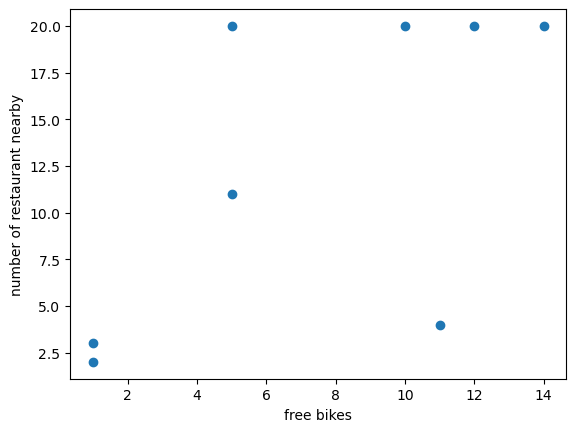

In [20]:
x = bike_amt['free_bikes']
y = nearby_venue

plt.scatter(x,y)
plt.xlabel('free bikes')
plt.ylabel('number of restaurant nearby')

Text(0, 0.5, 'review counts')

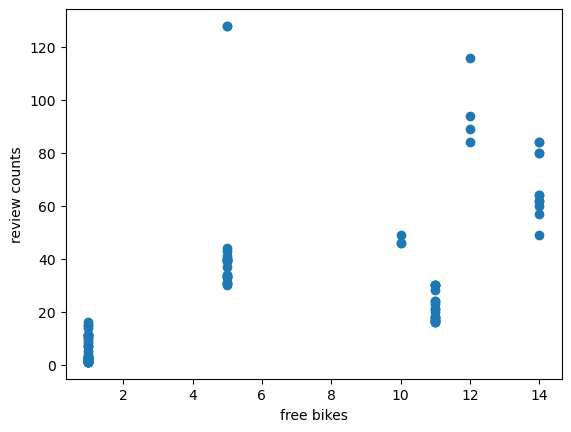

In [22]:
review_num = city_yelp_data['review_count'].sort_values()

x = city_yelp_data['free_bikes']
y = review_num

plt.scatter(x,y)
plt.xlabel('free bikes')
plt.ylabel('review counts')

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [41]:
def create_connection(path): 
    connection = None
    try: 
        connection = sql.connect(path)
        print('Connection Successful')
    except Error as err: 
        print(f"Error '{err}' has occurred")
    return connection

In [42]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as err:
        print(f"Error '{err}' has occurred")

In [43]:
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as err:
        print(f"Error '{err}' has occurred")

In [29]:
connection = create_connection('/Users/Oswal/Documents/GitHub/Project-Week-3/week_3_proj.sqlite')

Connection Successful


In [35]:
query = """CREATE TABLE IF NOT EXISTS city_yelp(
            name VARCHAR,
            country TEXT,
            city TEXT,
            categories VARCHAR(1000),
            review_count INT,
            rating FLOAT,
            near_station VARCHAR,
            address VARCHAR,
            empty_slots INT,
            free_bikes INT,
            latitude FLOAT,
            longitude FLOAT,
            timestamp TIMESTAMP,
            Unique_ID INT)
"""
execute_query(connection,query)

Query executed successfully


In [50]:
query = """CREATE TABLE IF NOT EXISTS city_foursquare(
            name VARCHAR,
            country TEXT,
            categories VARCHAR(1000),
            near_station VARCHAR,
            address VARCHAR,
            empty_slots INT,
            free_bikes INT,
            latitude FLOAT,
            longitude FLOAT,
            timestamp TIMESTAMP,
            Unique_ID INT)
"""
execute_query(connection,query)

Query executed successfully


In [36]:
city_yelp_data.to_sql('city_yelp', connection, if_exists='replace', index=False)

100

In [51]:
city_foursquare_data.to_sql('city_foursquare', connection, if_exists='replace', index=False)

1710

Look at the data before and after the join to validate your data.

In [44]:
query = 'SELECT * FROM city_yelp'
test = execute_read_query(connection, query)
for i in test[0:3]:
    print(i)

('De Danú', 'FR', 'Toulouse', "[{'alias': 'irish_pubs', 'title': 'Irish Pub'}]", 84, 4.0, '00197 - CASERNE PERIGNON', '6 AV LOUIS BLERIOT', 19, 1, 43.60038605818475, 1.464093716152017, '2022-12-05T00:29:57.070000Z', 197)
('La Dynamo', 'FR', 'Toulouse', "[{'alias': 'danceclubs', 'title': 'Dance Clubs'}, {'alias': 'musicvenues', 'title': 'Music Venues'}, {'alias': 'bars', 'title': 'Bars'}]", 31, 4.5, '00197 - CASERNE PERIGNON', '6 AV LOUIS BLERIOT', 19, 1, 43.60038605818475, 1.464093716152017, '2022-12-05T00:29:57.070000Z', 197)
('Au Poêle de la Bête', 'FR', 'Toulouse', "[{'alias': 'tapas', 'title': 'Tapas Bars'}, {'alias': 'beerbar', 'title': 'Beer Bar'}, {'alias': 'pubs', 'title': 'Pubs'}]", 18, 4.5, '00197 - CASERNE PERIGNON', '6 AV LOUIS BLERIOT', 19, 1, 43.60038605818475, 1.464093716152017, '2022-12-05T00:29:57.070000Z', 197)


In [46]:
city_yelp_data.shape

(100, 14)

In [47]:
city_yelp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          100 non-null    object 
 1   country       100 non-null    object 
 2   city          100 non-null    object 
 3   categories    100 non-null    object 
 4   review_count  100 non-null    int64  
 5   rating        100 non-null    float64
 6   near_station  100 non-null    object 
 7   Address       100 non-null    object 
 8   empty_slots   100 non-null    int64  
 9   free_bikes    100 non-null    int64  
 10  latitude      100 non-null    float64
 11  longitude     100 non-null    float64
 12  timestamp     100 non-null    object 
 13  Unique ID     100 non-null    int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 11.1+ KB


In [52]:
query = 'SELECT * FROM city_foursquare'
test = execute_read_query(connection, query)
for i in test[0:3]:
    print(i)

('De Danu', 'FR', "[{'id': 13006, 'name': 'Beer Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}}, {'id': 13018, 'name': 'Pub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}}, {'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}]", '00197 - CASERNE PERIGNON', '6 AV LOUIS BLERIOT', 19, 1, 43.60038605818475, 1.464093716152017, '2022-12-05T00:29:57.070000Z', 197)
('De Danu', 'FR', "[{'id': 13006, 'name': 'Beer Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}}, {'id': 13018, 'name': 'Pub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}}, {'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}]", '00213 - PUJOL - CHAUBET', '129 AV DE CASTRES', 16, 1

In [48]:
city_foursquare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1710 non-null   object 
 1   country       1710 non-null   object 
 2   categories    1710 non-null   object 
 3   near_station  1710 non-null   object 
 4   Address       1710 non-null   object 
 5   empty_slots   1710 non-null   int64  
 6   free_bikes    1710 non-null   int64  
 7   latitude      1710 non-null   float64
 8   longitude     1710 non-null   float64
 9   timestamp     1710 non-null   object 
 10  Unique ID     1710 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 147.1+ KB


In [49]:
city_foursquare_data.shape

(1710, 11)